# Practical 2: Sets and functions

In mathematics, a set is a collection of unique objects without an order. For example, the sets $\{0,1,2\}$ and \{1,0,2\} are identical. Futhermore, since each element in a set is unique, the set $\{0,0,1,2\}$ is identical to \{0,1,2\}.

## Sets

Python has a set data structure that encodes those important properties of mathematical sets. A Python set can be defined as follows:

In [ ]:
A = {0,1,2}

Python sets do not store the order and remove duplications, for example:

In [ ]:
A = {0,1,2}
B = {1,0,2}

print(A == B)

A = {0,0,1,2}
B = {0,1,2}

print(A == B)

True
True


You can also define the set of all numbers satisfieng a given property, for example, this is the set of all the positive integers smaller than 20 divisible by 4:

In [ ]:
A = {a for a in range(20) if a % 4 == 0}

print(A)

{0, 4, 8, 12, 16}


where $a$ % $b$ is remainder of $a$ when divided by $b$.

### Solved exercise 1
Using Python, create the set of all prime numbers smaller than 30. Remember that a prime number is defined as a number only divisible by 1 and by itself.

#### Solution
We can check if a number is prime by dividing it from all numbers smaller than itself and checking that the remainder is always different from 0. Let's define this primality check function as follows:

In [ ]:
def is_prime(n):
  for k in range(2,n):
    if n % k == 0:
      return False
  return True

is_prime(10)


False

We can now use this function to create the set of primes smaller than 30:

In [ ]:
primes = {p for p in range(2,30) if is_prime(p)}
print("The primes smaller than 30 are {}".format(primes))

The primes smaller than 30 are {2, 3, 5, 7, 11, 13, 17, 19, 23, 29}


### Exercises 1
- Using Python, create the set of all integers smaller than 30 and divisible by 6
- Using Python, create the set of all square numbers smaller than 40
- Using Python, create the set of all cube numbers smaller than 35
- Using Python, create the set of all numbers smaller than 40 that are co-prime with 10 (Two numbers are co-prime if the only number that divides both is 1)

In [ ]:
#Exercise 1A
A = {a for a in range(30) if a % 6== 0}
print(A)

{0, 6, 12, 18, 24}


In [ ]:
#Exercise 1B
import math
B = {b for b in range(40)  if (math.sqrt(b) % 1 ) == 0}
print(B)

{0, 1, 4, 36, 9, 16, 25}


In [ ]:
#Exercise 1C
C = {c for c in range(35) if (math.pow(c, 1/3)) % 1 == 0}
print(C)

{0, 1, 27, 8}


In [ ]:
#Exercise 1D
# Got this nice function thanks to Aine
def dividers(n):
  dividers = set()
  for i in range(2, n + 1):
    if n % i == 0:
      dividers.add(i)
  return dividers

def get_coprimes(m, n):
  coprimes = set()
  a = dividers(n)
  for i in range(1, m):
    b = dividers(i)
    
    if a.isdisjoint(b):
      coprimes.add(i)
  return coprimes

coprimes = get_coprimes(18, 1)

print(coprimes)


{1, 3, 5, 7, 9, 11, 13, 15, 17}


## Functions

Functions are operations that transform every possible input $x$ into a well determined output $y$. For example, a function can output $y$ from a series of arithmetic operations on $x$ such as in the following case:

$$
y = f(x) = \frac{4 x + 6 x^2 + 6}{2x}
$$

A function can also be defined in pieces, for example, the absolute value function is defined as follows:

$$
\begin{align}
|x| = \left\{ \begin{array}{cc} 
                x & \hspace{5mm} \text{if} ~~~ x \geq 0 \\
                -x & \hspace{5mm} \text{otherwise} \\
                \end{array} \right.
\end{align}
$$

Functions can be defined in python using lambdas, for example:

In [ ]:
f = lambda x: (4*x + 6*x**2 + 6)/(2*x)

abs = lambda x: x if x >= 0 else -x

We can now evaluate these functions at a point such as for example x = -5:

In [ ]:
print("f(-5) = {}".format(f(-5)))
print("|-5| = {}".format(abs(-5)))

f(-5) = -13.6
|-5| = 5


We can also plot these function using the matplotlib.pyplot library:

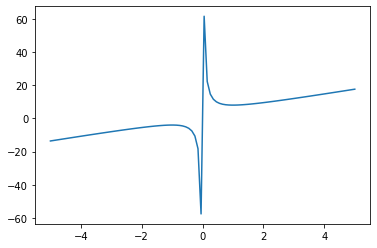

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_range = np.linspace(-5,5,100)

plt.plot(x_range, [f(x) for x in x_range])

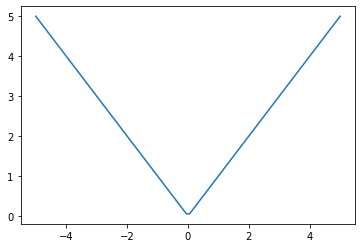

In [ ]:
plt.plot(x_range, [abs(x) for x in x_range])

### Exercises 2
Use Python to plot the following functions:
- $f(x) = x + 3x + 5 x^2$
- $f(x) = 1/x ~~\text{if} ~~ x < 0 ~~\text{otherwise} ~~ x$
- $f(x) = -1 ~~\text{if} ~~ x < 0 ~~\text{otherwise} ~~ 1$
- $f(x) = (2x + 4x^4)/(3 + x^2)$

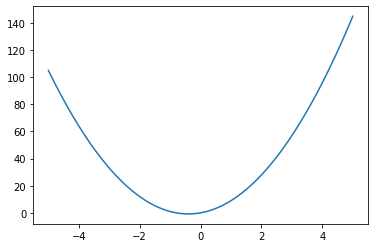

In [ ]:
#Exercise 2A
f = lambda x: (x + 3*x + 5*x**2)
plt.plot(x_range, [f(x) for x in x_range])

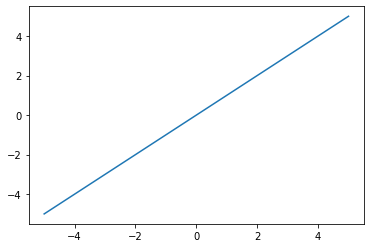

In [ ]:
#Exercise 2B
f = lambda x: x/1 if x < 0 else x
plt.plot(x_range, [f(x) for x in x_range])

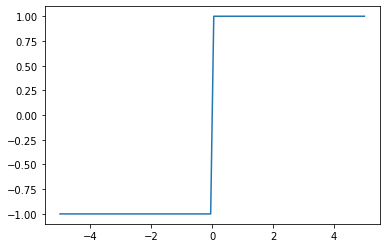

In [ ]:
#Exercise 2C
f = lambda x: -1 if x < 0 else 1
plt.plot(x_range, [f(x) for x in x_range])

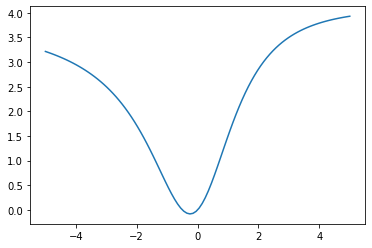

In [ ]:
#Exercise 2D
f = lambda x: (2*x + 4*x**2) / (3+x**2)
plt.plot(x_range, [f(x) for x in x_range])

## Rational functions

Rational functions are defined as ratios of polynomials. the general form of a rational function is:

$$
f(x) = \frac{\sum_n^N \alpha_n x^n}{\sum_m^M \beta_m x^m}
$$

Rational functions have poles where their value goes to plus or minus infinity. The necessary condition for a point $x'$ to be a pole is that it is a zero of the polynomial in the denumerator:

$$
\sum_m^M \beta_m {x'}^m = 0
$$

In fact, poles are a consequence of a "division by zero". This equation is the kind of algebrain equations you studied in high school. As an example, consider the following rational function:

$$
f(x) = \frac{5}{a x^2 + b x + c}
$$

The equation for the poles is:

$$
a x^2 + b x + c = 0
$$

which has the two solutions given by the quadratic formula:

$$
x_{\pm} = \frac{-b \pm \sqrt{b^2 - 4 a c}}{2 a}
$$

In this case, both these solutions are poles of the rational function. However, this is not always the case since a term in the numerator can 'cancel out" the zero in the denumerator. For example, consider the foillowing function:

$$
f(x) = \frac{x^2 - 1}{x^2 - x}
$$

the solutions of $x^2 - x = 0$ are $x = 0$ and $x = 1$. However, only $x = 0$ is a pole since both numerator and denominator go to zero as $x$ tends to 1 and these two terms exactly cancel out. 

### Solved exercise 2

Prove this.

#### Solution
the numerator can be factorized as $x^2 - 1 = (x - 1) (x + 1)$ while the denumerator can be factorized as $x^2 - x = x (x - 1)$. Therefore:

$$
f(x) = \frac{x^2 - 1}{x^2 - x} = \frac{(x - 1)(x + 1)}{x (x - 1)} = \frac{(x + 1)}{x}
$$

From this, it is easy to see that the only pole is $x = 0$.

### Exercises 3
Find the poles of the following rational functions:
- $f(x) = \frac{1 + x}{x^3 + x^2}$
- $f(x) = \frac{3}{2 - x^2}$
- $f(x) = \frac{(2 + x)(3 + x)x}{(x - 1)(x^2 + 5x + 6)}$
- $f(x) = \frac{x + 2 + \sqrt{2}}{2x + 4x^2 + x^3}$
- $f(x) = \frac{x^2 - 1}{1 + 2x + x^2}$

#### Solutions
- $0$
- $\pm \sqrt{2}$
- $1$
- $0, \sqrt{2} - 2$
- $-1$




> Exercise 3A
$$
Simplify\\
f(x) = \frac{1 + x}{x^3 + x^3} = \frac{x + 1}{x^2 (x + 1)} = \frac{1}{x^2} \\
$$

$$
Equate\ denominator\ with\ 0\\
x^2 = 0\\
$$

$$
Find\ x\\
x  = 0\\
$$

$$
Plug\ x\ into\ the\ equation\\
\frac{1}{0^2} = \frac{1}{0}\\
$$

$$
It\ poles\ at\ 0
$$

> Exercise 3B
$$
Simplify\\
f(x) = \frac{3}{2 - x^2} = \frac{1}{2 - x^2}\\ 
$$

$$
Equate\ denominator\ with\ 0\\
2\ - x^2 = 0\\
$$

$$
Find\ x\\
x  = \pm \sqrt{2}\\
$$

$$
Plug\ x\ into\ the\ equation\\
\frac{1}{2 - \sqrt{2}^2} = \frac{1}{0}\\
$$

$$
It\ poles\ at\ \pm \sqrt{2}
$$

> Exercise 3C
$$
Simplify\\
f(x) = \frac{(2 + x)(3 + x)x}{(x-1)(x^2 + 5x + 6)} = \frac{x(x + 2)(x + 3)}{(x - 1)(x + 2)(x + 3)} = \frac{x}{x - 1}\\
$$

$$
Equate\ denominator\ with\ 0\\
x\ - 1 = 0\\
$$

$$
Find\ x\\
x  = 1\\
$$

$$
Plug\ x\ into\ the\ equation\\
\frac{1}{1-1} = \frac{1}{0}\\
$$

$$
It\ poles\ at\ 1
$$

> Exercise 3D
$$
Simplify\\
f(x) = \frac{x + 2 + \sqrt{2}}{2x + 4x^2 + x^3} = \frac{x + 2 + \sqrt{2}}{x(x^2 + 4x + 2)}\\
$$

$$
Equate\ denominator\ with\ 0\\
x\ = 0\ or\ x^2 + 4x\ + 2\ = 0\\
$$

$$
find\ x\ by\ applying\ quadratic\ formula\\
x_{\pm} = \frac{-4 \pm \sqrt{4^2 - 4 (1 \cdot 2)}}{2 (1)} = \frac{-4 \pm \sqrt{4^2 - 8}}{2} = \frac{-4 \pm \sqrt{8}}{2} = \frac{-4 \pm 2\sqrt{2}}{2} = \frac{-4 \pm \sqrt{2}}{2} = -2 \pm \sqrt{2}\\ x =-2 + \sqrt{2}\ or\ x = -2 - \sqrt{2} \\
$$

$$
0 + 2 + \sqrt{2} = 3.41\\ 
or\\ -2 + \sqrt{2} + 2 + \sqrt{2}  = 2.82\\ 
or\\ -2 - \sqrt{2} + 2 + \sqrt{2} = 0\\
$$

$$
It\ poles\ at\\
0\ and\ -2 + \sqrt{2} 
$$

> Exercise 3E
$$
Simplify\\
f(x) = \frac{x^2 - 1}{1 + 2x + x^2} = \frac{(x - 1)(x + 1)}{(x + 1)^2} = \frac{x - 1}{x + 1}\\
$$

$$
Equate\ denominator\ with\ 0\\
x\ + 1 = 0\\
$$

$$
find\ x\\
x  = -1\\
$$

$$
plug\ x\ into\ the\ equation\\
\frac{-1 - 1}{-1 + 1} = \frac{-2}{0}\\
$$

$$
It\ poles\ at\ -1
$$



### Python exercises 3
Use Python to plot those function on a range and to check your computations. You should see that the function goes to +- infinity around the poles.

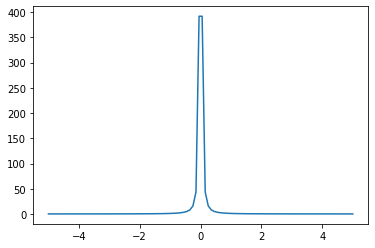

In [ ]:
# Exercise 3A
f = lambda x: (1 + x) / (x**3 + x**2)
plt.plot(x_range, [f(x) for x in x_range])

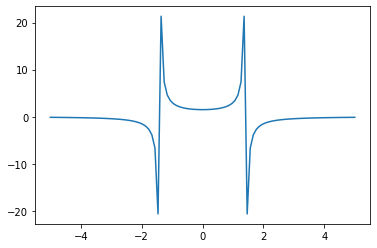

In [ ]:
# Exercise 3B
f = lambda x: ( 3 / (2 - x**2))
plt.plot(x_range, [f(x) for x in x_range])

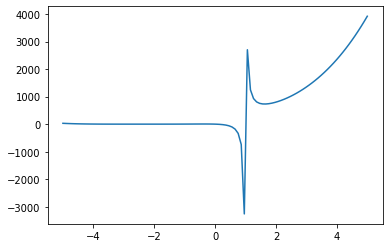

In [ ]:
# Exercise 3C
f = lambda x: (2+x)*(3+x)*x / (x-1)*(x**2 + 5*x + 6)
plt.plot(x_range, [f(x) for x in x_range])

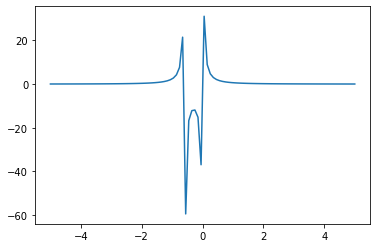

In [ ]:
# Exercise 3D
f = lambda x: (x + 2 + math.sqrt(2)) / (2*x + 4*x**2 + x**3)
plt.plot(x_range, [f(x) for x in x_range])

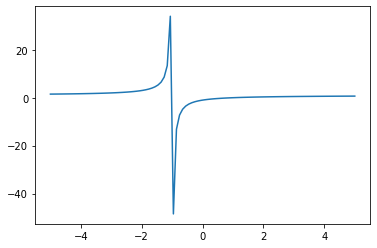

In [ ]:
# Exercise 3E
f = lambda x: (x**2 - 1) / (1 + 2*x + x**2)
plt.plot(x_range, [f(x) for x in x_range])

## Asymptotic relations between functions

In the previous lecture we discussed asymptotic relations between sequences. We can analogously define asymptotic relations between functions. However, in this case we need to specify a point $x'$ around which we are interested in studying the asymptotic behavior. Two functions $f(x)$ and $g(x)$ are said to be asymptotic around $x'$ when:

$$
\lim_{x \rightarrow x'} \frac{f(x)}{g(x)} = \lim_{x \rightarrow x'} \frac{g(x)}{f(x)} = 1~.
$$

In this case, we write $f(x) \sim g(x)$. However, be careful since this notation "hides" the point $x'$. Two factions that are asymptotic at $x'$ are not necessarely asymptotic around any other point!

Asymptotic relations between functions are "boring" when $f(x)$ and $g(x)$ are continuous $x'$ is neither a pole or a zero of either of functions. In fact, in that case we have:

$$
\lim_{x \rightarrow x'} \frac{f(x)}{g(x)} =  \frac{\lim_{x \rightarrow x'} f(x)}{\lim_{x \rightarrow x'} g(x)} = \frac{f(x')}{g(x')}~.
$$

(Note that $\lim_{x \rightarrow x'} f(x) = f(x')$ is the definition of continuity) Therefore, two continuous functions that have a non-zero value at $x'$ are asymptotic if and only if the have the same value at $x'$. 

### Solved exercises 3
Are the following two functions asymptotic around $x' = 1"?

$$
f(x) = (x - 1) + 3 (x - 1)^2
$$

$$
g(x) = (x - 1)
$$

#### Solution
Yes! Consider the limit of the ratio:

$$
\lim_{x \rightarrow 1} \frac{(x - 1) + 3 (x - 1)^2}{(x - 1)} = \lim_{x \rightarrow 1} \frac{(x - 1)}{(x - 1)} + \lim_{x \rightarrow 1} \frac{3 (x - 1)^2}{(x - 1)} = 1 + 3 \lim_{x \rightarrow 1} (x - 1) = 1
$$

Note that in this case the lowest power dominates the asymptotic behavior! In fact, the term $(x - 1)^2$ goes to zero much faster than $(x - 1)$  when $x$ tends to $1$ and it is therefore "irrelevant". We can see this by plotting those functions using Python:

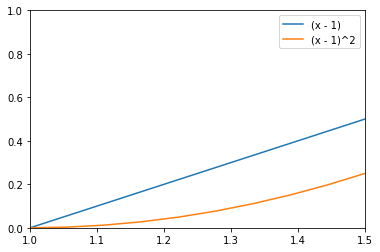

In [ ]:
f1 = lambda x: (x - 1)
f2 = lambda x: (x - 1)**2

x_range = np.linspace(1,1.5,10)

plt.plot(x_range, [f1(x) for x in x_range], label="(x - 1)")
plt.plot(x_range, [f2(x) for x in x_range], label="(x - 1)^2")
plt.xlim((1,1.5))
plt.ylim((0,1))
plt.legend(loc="best")

### Exercises 4
Determine if the following pairs of functions are asymptotic at $x = 0$.
- $f(x) = 2x + x^2$, $g(x) = x + x^3$
- $f(x) = x + x^2$, $g(x) = x + x^3$
- $f(x) = 2 + x$, $g(x) = x$
- $f(x) = 1 + x + 4x^2 + 3x^3 + 5x^4$, $g(x) = 1 + x^6$
- $f(x) = 4 x^6 + x^8$, $g(x) = 3x^3 + 4 x^6$

#### Solutions
- No
- Yes
- No
- Yes
- No



> Exercise 4A
$$
\lim_{x \rightarrow 0} \frac{2x + x^2}{x + x^3} = \lim_{x \rightarrow 0} \frac{x(2 + x)}{x(1 + x^2)} = \lim_{x \rightarrow 0} \frac{2}{1 + x} = 2
$$

> Exercise 4B
$$
\lim_{x \rightarrow 0} \frac{x + x^2}{x + x^3} = \lim_{x \rightarrow 0} \frac{x(1 + x)}{x(1 + x^2)} = \lim_{x \rightarrow 0} \frac{1}{1} = 1
$$

> Exercise 4C
$$
\lim_{x \rightarrow 0} \frac{2 + x}{x}  = \lim_{x \rightarrow 0} 2 = 2
$$

> Exercise 4D
$$
\lim_{x \rightarrow 0} \frac{1 + x + 4x^2 + 3x^3 + 5x^4}{1 + x^6} = \lim_{x \rightarrow 0} =\frac{1 + 0 + 4(0)^2 + 3(0)^3 + 5(0)^4}{1 + 0^6} = \lim_{x \rightarrow 0} \frac{1}{1} = 1
$$

> Exercise 4E
$$
\lim_{x \rightarrow 0} \frac{4x^6 + x^8}{3x^3 + 4x^6} = \lim_{x \rightarrow 0} \frac{x^6(4 + x^2)}{x^3(3 + 4x^3)} = \lim_{x \rightarrow 0} \frac{x^3(4+x^2)}{3 + 4x^3} = \lim_{x \rightarrow 0} \frac{0^3(4+0^2)}{3 + 4(0)^3} = 0\\
$$

$$
or\\
\lim_{x \rightarrow 0} \frac{4x^6 + x^8}{3x^3 + 4x^6} = \lim_{x \rightarrow 0} \frac{x^3(4x^3 + x^5)}{x^3(3 + 4x^3)} = \lim_{x \rightarrow 0} \frac{x^5+4x^3}{3 + 4x^3} = \lim_{x \rightarrow 0} \frac{x^5}{3} = \lim_{x \rightarrow 0}\frac{0}{3} = 0\\
$$

$$
I\ have\ found\ multiple\ ways\ to\ factorise\ this\ excersise\ which\ one\ is\ actually\ prefered?
$$

### Python exercises 4
Check those asymptotic relations numerically using Python.

#### Solution of the first question
Let's write the two functions using Python:

In [ ]:
f = lambda x: 2*x + x**2
g = lambda x: x + x**3

We can check the limit of the ratio numerically by evaluating their ratio for a very small number such as $0.0001$. Note that we can't evaluate the ratio at zero since dividing by zero would throw an error!

In [ ]:
print("The approximate limit of the ratio is {}".format(f(0.0001)/g(0.0001)))

The approximate limit of the ratio is 2.0000999799990002


The result is clearly not close to one, therefore the two sequences are not asymptotic.

In [ ]:
def is_asymptotic(f, g):
  N = 0.0001
  result = (f(N)/g(N))
  print("The approximate limit of the ratio is {}".format(result))
  if round(result) == 1:
    print('Is asymptotic')
  else:
    print('Is not asymptotic')

In [ ]:
# Exercise 4B
f = lambda x: x + x**2
g = lambda x: x + x**3
is_asymptotic(f, g)

The approximate limit of the ratio is 1.0000999899990002
Is asymptotic


In [ ]:
# Exercise 4C
f = lambda x: 2 + x
g = lambda x: x
is_asymptotic(f, g)

The approximate limit of the ratio is 20001.0
Is not asymptotic


In [ ]:
# Exercise 4D
f = lambda x: (1 + x + 4*x**2 + 3*x**3 + 5*x**4)
g = lambda x: 1 + 6*x
is_asymptotic(f, g)

The approximate limit of the ratio is 0.999500339799121
Is asymptotic


In [ ]:
# Exercise 4E
f = lambda x: 4*x**6 + x**8
g = lambda x: 3*x**3 + 4*x**6
is_asymptotic(f, g)

The approximate limit of the ratio is 1.3333333366648891e-12
Is not asymptotic


## Asymptotic relations involving trascendental functions

Trascendental functions are functions that cannot be written in terms on polynomials. Typical examples are the exponential, its inverse the logarithm and trigonometric functions such as sine, cosine and tangent. While trascendental functions are more complicated than polynomials, using asymptotic relations we can reduce them locally to much simpler functions. For example, the function:

$$
f(x) = \exp(x) - 1
$$

is asymptotic to $x$ for $x$ tending to $0$. here is a list of useful asymptitic relations involving transcendetal functions (for $x$ tending to zero):
- $\exp(x) - 1 \sim x$
- $\sin(x) \sim x$
- $\cos(x) - 1 \sim -\frac{1}{2} x^2$
- $\tan(x) \sim x$
- $\log(1 + x) \sim x$

### Python exercises 5
Plot each of these functions together with its asymptoticly related simple function. You should try to understand what asymptotically related functions have in common.

#### Solution of question one

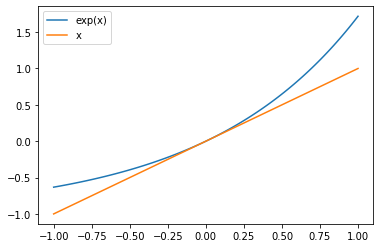

In [ ]:
f = lambda x: np.exp(x) - 1
g = lambda x: x

x_range = np.linspace(-1,1,100)

plt.plot(x_range, [f(x) for x in x_range], label="exp(x)")
plt.plot(x_range, [g(x) for x in x_range], label="x")
plt.legend(loc="best")

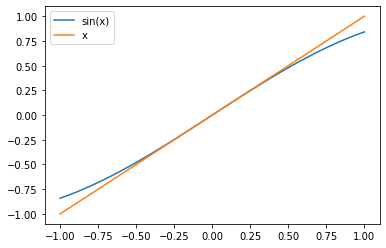

In [ ]:
# Exercise 5B
f = lambda x: np.sin(x)
g = lambda x: x
plt.plot(x_range, [f(x) for x in x_range], label="sin(x)")
plt.plot(x_range, [g(x) for x in x_range], label="x")
plt.legend(loc="best")

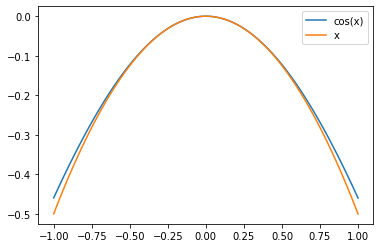

In [ ]:
# Exercise 5C
f = lambda x: np.cos(x) - 1
g = lambda x: -1/2*x**2
plt.plot(x_range, [f(x) for x in x_range], label="cos(x)")
plt.plot(x_range, [g(x) for x in x_range], label="x")
plt.legend(loc="best")

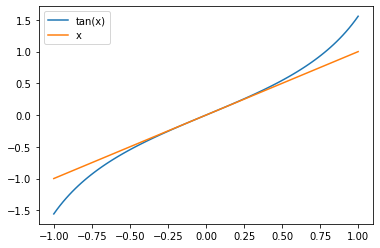

In [ ]:
# Exercise 5D
f = lambda x: np.tan(x)
g = lambda x: x
plt.plot(x_range, [f(x) for x in x_range], label="tan(x)")
plt.plot(x_range, [g(x) for x in x_range], label="x")
plt.legend(loc="best")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


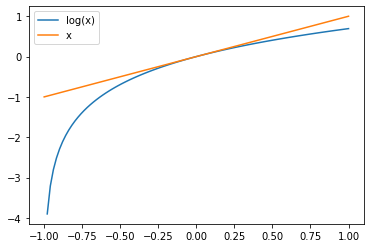

In [ ]:
# Exercise 5E
f = lambda x: np.log(1 + x)
g = lambda x: x
plt.plot(x_range, [f(x) for x in x_range], label="log(x)")
plt.plot(x_range, [g(x) for x in x_range], label="x")
plt.legend(loc="best")

## Computing limits using asymptotics

Like in the case of sequences, asymptotic relations are very useful when we need to compute limits. Like for sequences, two functions that are asymptotically related around a point $x'$ have the same limit at $x'$ (if they have a limit). Furthermore, we can divide and multiply both sides of an asymptotic relation by a third function $h(x)$ and still get a valid asymptotic relation. However, note that we CANNOT sum or subtract a function from both sides of an asymptotic relation.

We can use these results to compute undeterminate limits of ratios of functions that go to zero at $x'$. For exanple, consider the following limit:

$$
\lim_{x \rightarrow 0} \frac{\sin(x)}{x + x^2}
$$

Using the asymptotic relation of the size at zero, we get:

$$
\frac{\sin(x)}{x + x^2} \sim \frac{x}{x + x^2} =  \frac{1}{1 + x}
$$

Therefore:

$$
\lim_{x \rightarrow 0} \frac{\sin(x)}{x} = \lim_{x \rightarrow 0} \frac{1}{1 + x} = 1
$$

### Exercises 6
Compute the limit of the following functions for $x$ tending to $0$.
- $f(x) = \frac{x^2 + 5 x^5}{3x^2 + 3 x^4}$
- $f(x) = \frac{x \sin(x)}{7x^2 + x^4}$
- $f(x) = \frac{5(\exp(x) - 1)x^2}{8x^7 + 2x^3 + x^{12}}$
- $f(x) = \frac{x}{\tan(x)}$
- $f(x) = \frac{\exp(x)^2 - 1}{x}$
- $f(x) = \frac{\cos(x)^2 - 1}{x^2}$
- $f(x) = \frac{\tan(x)^2}{\cos(x) - 1}$
- $f(x) = \frac{2x + x^2 + 5 x^5}{x + 3x^2 + 3 x^4 + 3x}$

#### Solutions
- $1/3$
- $1/7$
- $5/2$
- $1$
- $2$
- $-1$
- $-2$
- $1/2$

> Exercise 6A
$$
\lim_{x \rightarrow 0} \frac{x^2 + 5 x^5}{3x^2 + 3 x^4} = \lim_{x \rightarrow 0} \frac{x^2}{3x^2} = \lim_{x \rightarrow 0} \frac{1}{3} = \frac{1}{3}
$$

> Exercise 6B
$$
\lim_{x \rightarrow 0} \frac{x \sin(x)}{7x^2 + x^4} = \lim_{x \rightarrow 0} \frac{x^2}{7x^2} = \lim_{x \rightarrow 0} \frac{1}{7} = \frac{1}{7}
$$

> Exercise 6C
$$
\lim_{x \rightarrow 0}\frac{5(\exp(x) - 1)x^2}{8x^7 + 2x^3 + x^{12}} =  \lim_{x \rightarrow 0}\frac{5(x)\cdot x^2}{2x^3} =  \lim_{x \rightarrow 0}\frac{5x^3}{2x^3} = \lim_{x \rightarrow 0} \frac{5}{2} = \frac{5}{2}
$$

> Exercise 6D
$$
\lim_{x \rightarrow 0} \frac{x}{\tan(x)} = \lim_{x \rightarrow 0} \frac{x}{x} = \lim_{x \rightarrow 0} \frac{1}{1} = 1
$$

> Exercise 6E

$$
\lim_{x \rightarrow 0} \frac{\exp(x)^2-1}{x} = \lim_{x \rightarrow 0} \frac{(\exp(x)-1)(exp(x)+1)}{x} = \lim_{x \rightarrow 0} \frac{x(x+1)}{x} = \lim_{x \rightarrow 0} \frac{1+1}{1} = 2
$$

> Exercise 6F
$$
\lim_{x \rightarrow 0} \frac{\cos(x)^2-1}{x^2} = \lim_{x \rightarrow 0} \frac{(\cos(x)-1)(cos(x)+1)}{x^2} = \lim_{x \rightarrow 0} \frac{\frac{1}{x^2}(\cos(-x)-1)(cos(x)+1)}{\frac{1}{x^2}(x^2)} = \lim_{x \rightarrow 0} \frac{-\frac{1}{2}(1)^2(1+1)}{1}= \lim_{x \rightarrow 0} \frac{-1}{1} = -1
$$

> Exercise 6G
$$
\lim_{x \rightarrow 0} \frac{tan(x)^2}{\cos(x)-1} = \lim_{x \rightarrow 0} \frac{x^2}{-\frac{1}{2}^2} = \lim_{x \rightarrow 0} \frac{1}{-\frac{1}{2}} =-2
$$

> Exercise 6H

$$
\lim_{x \rightarrow 0}\frac{2x + x^2 + 5 x^5}{x + 3x^2 + 3 x^4 + 3x} = \lim_{x \rightarrow 0} \frac{2x}{x + 3x} = \lim_{x \rightarrow 0} \frac{2x}{4x} = \lim_{x \rightarrow 0} \frac{2}{4} = \frac{1}{2}\\
$$

$$
or\\
\lim_{x \rightarrow 0}\frac{2x + x^2 + 5 x^5}{x + 3x^2 + 3 x^4 + 3x} = \lim_{x \rightarrow 0}\frac{x(2 + x + 5 x^4)}{x(3x + 3 x^4 + 4)} = \lim_{x \rightarrow 0} \frac{2 + x + 5 x^4}{3x + 3 x^3 + 4} = \lim_{x \rightarrow 0}\frac{2 + 0 + 5(0)^4}{3(0) + 3(0)^3 + 4} = \lim_{x \rightarrow 0} \frac{2}{4}= \frac{1}{2}
$$